In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bootstrap
import seaborn as sns


results = {'\nHyperparameter set': [], 'nshd_c': [], 'tpr_c': []}
results_dtypes = {'\nHyperparameter set': str, 'nshd_c': float, 'tpr_c': float}
results = pd.DataFrame(results).astype(results_dtypes)
result_files = {
    'optuna_ste_best_logistic':
        'STE_Logistic_84',
    'optuna_ste_best':
        'STE_Gumbel_84',
    'optuna_none_ste_best_logistic':
        'STE_Logistic_None',
    'optuna_none_ste_best_gumbel':
        'STE_Gumbel_None',
    '2022-08-13_BST_11:33:45,122_logistic_candidate_66_test_dtc':
        'IMLE_Logistic_66',
    '2022-08-13_BST_11:25:23,332_gumbel_candidate_66_test_dtc':
        'IMLE_Gumbel_66',
    'logistic_candidate_none_1000eps':
        'IMLE_Logistic_None',
    'gumbel_candidate_none_1000eps':
        'IMLE_Gumbel_None',
    'logistic_candidate_66_sfe':
        'SFE_Logistic_66'
}
meanprops={
    "marker":"o", "markerfacecolor":"white", "markeredgecolor":"black",
    "markersize":"10"
}
usecols = ['nshd_c', 'tpr_c']
for file in result_files:
    result = pd.read_csv(file + '.csv', usecols=usecols)
    result['\nHyperparameter set'] = result_files[file]
    results = pd.concat((results, result.astype(results_dtypes)), ignore_index=True)
results = results.rename(columns={'tpr_c': 'prec_c'})  # Correcting for
 # metrics error


\nHyperparameter set
STE_Logistic_84       0.583359
STE_Gumbel_84         0.637756
STE_Logistic_None     0.706944
STE_Gumbel_None       0.775000
IMLE_Logistic_None    1.062500
IMLE_Logistic_66      1.086500
IMLE_Gumbel_66        1.170538
IMLE_Gumbel_None      1.201389
SFE_Logistic_66       1.673821
Name: nshd_c, dtype: float64


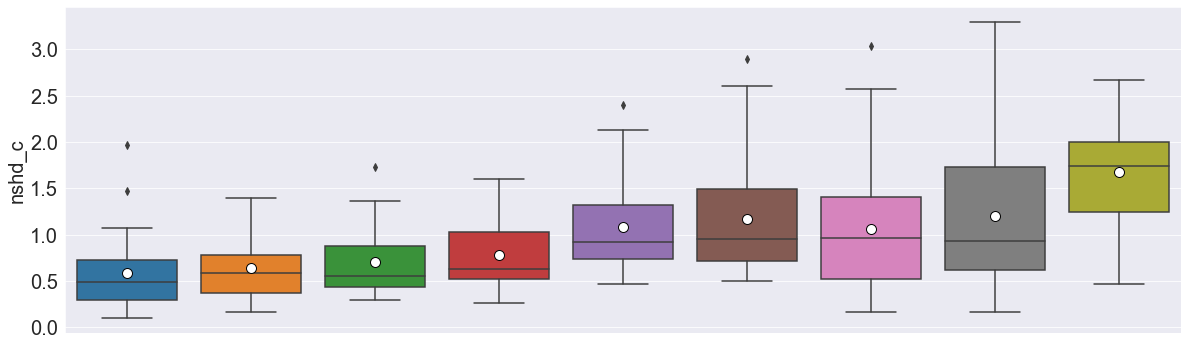

In [2]:
matplotlib.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(20, 6))
frame1 = sns.boxplot(
    x='\nHyperparameter set', y='nshd_c', data=results,
    showmeans=True, meanprops=meanprops)
# plt.xticks(rotation = 75, ha='right')
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.set_xlabel(None)
# fig.savefig('hps_compared_nshd_c.pdf')
print(results.groupby("\nHyperparameter set").mean().sort_values('nshd_c')['nshd_c'])

\nHyperparameter set
STE_Logistic_None     0.839190
STE_Gumbel_None       0.826605
STE_Logistic_84       0.823805
STE_Gumbel_84         0.815197
IMLE_Logistic_None    0.733827
IMLE_Gumbel_None      0.697395
IMLE_Logistic_66      0.649100
IMLE_Gumbel_66        0.628460
SFE_Logistic_66       0.456015
Name: prec_c, dtype: float64


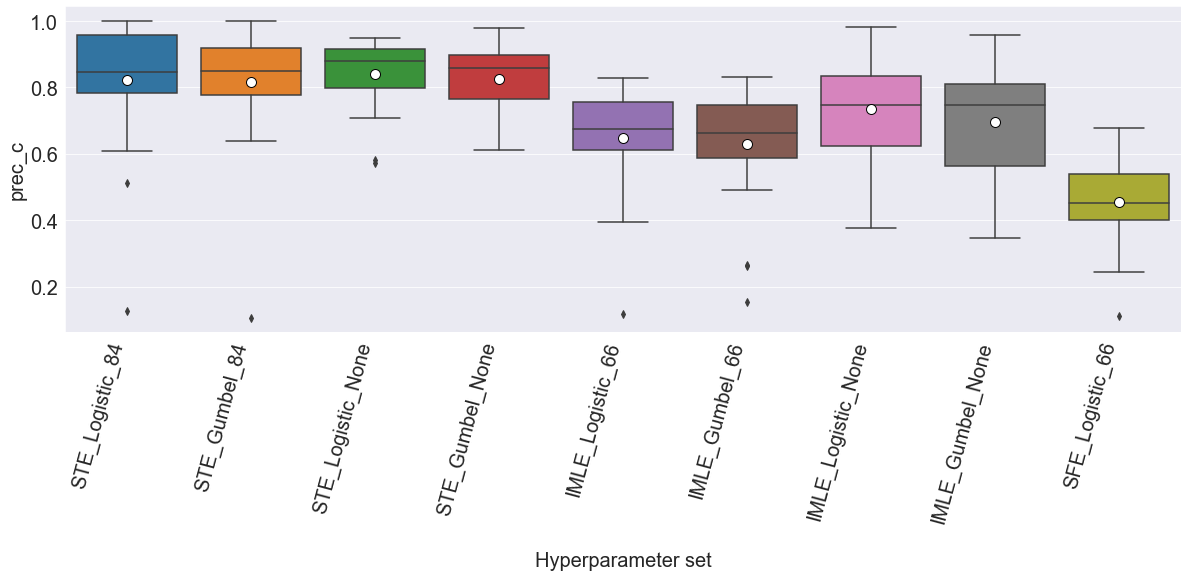

In [3]:
fig, ax = plt.subplots(figsize=(20, 6))
frame1 = sns.boxplot(
    x='\nHyperparameter set', y='prec_c', data=results,
    showmeans=True, meanprops=meanprops)
plt.xticks(rotation = 75, ha='right')
# plt.tight_layout()
# fig.savefig('hps_compared_tpr_c.png')
print(results.groupby("\nHyperparameter set").mean().sort_values(
    'prec_c', ascending=False)['prec_c'])

BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.453     , 0.72505585]), high=array([0.78764868, 0.87680744])), standard_error=array([0.08235646, 0.03570455]))
BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.51907692, 0.7186531 ]), high=array([0.78966667, 0.86230438])), standard_error=array([0.06848594, 0.03316502]))
BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.58333333, 0.7883832 ]), high=array([0.87777778, 0.87446618])), standard_error=array([0.07401331, 0.02140265]))
BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.6375    , 0.78079904]), high=array([0.93888889, 0.86623527])), standard_error=array([0.07660657, 0.02176053]))
BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.90877018, 0.57090305]), high=array([1.31244763, 0.69644158])), standard_error=array([0.10216968, 0.030302  ]))
BootstrapResult(confidence_interval=ConfidenceInterval(low=array([0.96958974, 0.54721514]), high=array([1

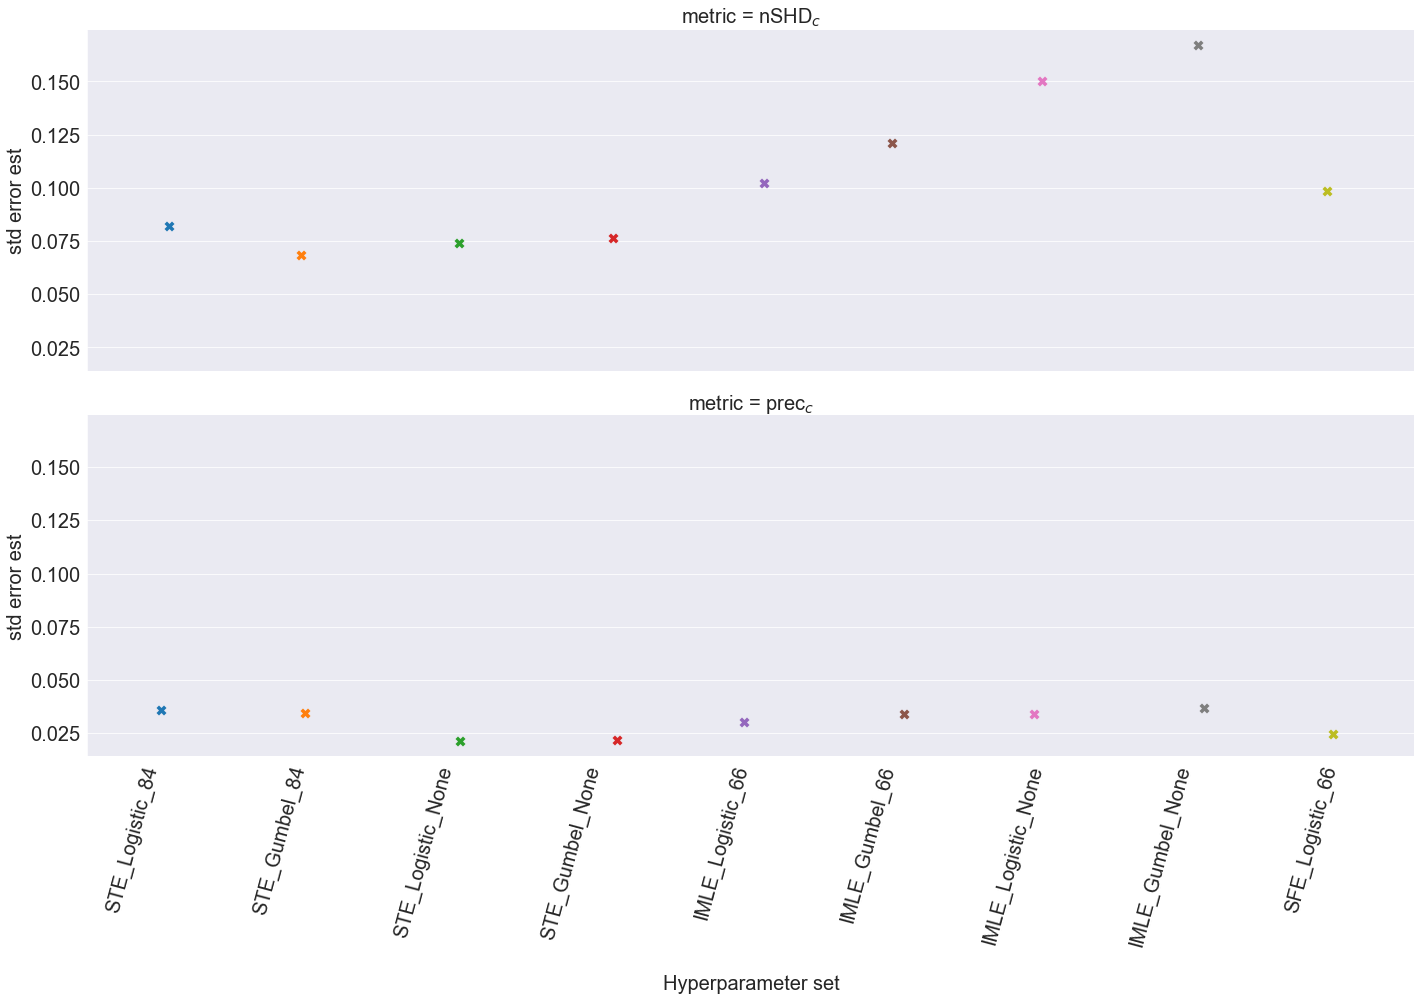

In [4]:

bs_dict = {'\nHyperparameter set': [], 'metric': [], 'std error est': []}

for result in result_files.values():
    result_data = results[results['\nHyperparameter set'] == result]
    result_data = result_data[['nshd_c', 'prec_c']].to_numpy()
    print(bootstrap((result_data, ), np.mean))
    sd_est_n, sd_est_t = bootstrap((result_data, ), np.mean).standard_error
    bs_dict['\nHyperparameter set'].append(result)
    bs_dict['metric'].append(r'nSHD$_c$')
    bs_dict['std error est'].append(sd_est_n)
    bs_dict['\nHyperparameter set'].append(result)
    bs_dict['metric'].append(r'prec$_c$')
    bs_dict['std error est'].append(sd_est_t)
bs_df = pd.DataFrame(bs_dict)
sns.catplot(x='\nHyperparameter set', y='std error est', row='metric',
            data=bs_df,
            height=6, aspect = 20/6,
            marker="X",s=10)
plt.xticks(rotation = 75, ha='right');
# fig.savefig('bootstrap.pdf');
